# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv('insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Identifying missing values

In [4]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Converting categorical attributes to numerical

In [5]:
from sklearn.preprocessing import LabelEncoder
#sex
labelencoder = LabelEncoder()
labelencoder.fit(dataset.sex.drop_duplicates()) 
dataset.sex = labelencoder.transform(dataset.sex)
# smoker or not
labelencoder.fit(dataset.smoker.drop_duplicates()) 
dataset.smoker = labelencoder.transform(dataset.smoker)

In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
dataset['Region_Southwest'] = dataset.region.map({'southwest':1,'southeast':0,'northwest':0,'northeast':0})
dataset['Region_Southeast'] = dataset.region.map({'southwest':0,'southeast':1,'northwest':0,'northeast':0})
dataset['Region_Northwest'] = dataset.region.map({'southwest':0,'southeast':0,'northwest':1,'northeast':0})
dataset['Region_Northeast'] = dataset.region.map({'southwest':0,'southeast':0,'northwest':0,'northeast':1})
dataset.head()

,age,sex,bmi,children,smoker,region,charges,Region_Southwest,Region_Southeast,Region_Northwest,Region_Northeast
0,19,0,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0,0
3,33,1,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,0,0,1,0


# Avoiding dummy variable trap

In [8]:
dataset.drop('Region_Northeast',axis=1,inplace = True)
dataset.drop('region',axis=1,inplace = True)

In [9]:
dataset.head()

,age,sex,bmi,children,smoker,charges,Region_Southwest,Region_Southeast,Region_Northwest
0,19,0,27.900,0,1,16884.92400,1,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,0,0,1
4,32,1,28.880,0,0,3866.85520,0,0,1


# Checking correlation between variables

In [10]:
dataset.corr()['charges'].sort_values()

Region_Southwest   -0.043210
Region_Northwest   -0.039905
sex                 0.057292
children            0.067998
Region_Southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker              0.787251
charges             1.000000
Name: charges, dtype: float64

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'bmi'),
 Text(3.5, 0, 'children'),
 Text(4.5, 0, 'smoker'),
 Text(5.5, 0, 'charges'),
 Text(6.5, 0, 'Region_Southwest'),
 Text(7.5, 0, 'Region_Southeast'),
 Text(8.5, 0, 'Region_Northwest')]

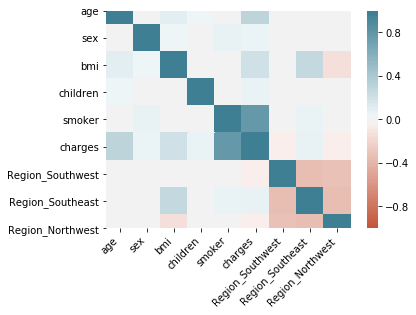

In [11]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [13]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '400px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,sex,bmi,children,smoker,charges,Region_Southwest,Region_Southeast,Region_Northwest
age,1,-0.021,0.11,0.042,-0.025,0.3,0.01,-0.012,-0.00041
sex,-0.021,1,0.046,0.017,0.076,0.057,-0.0042,0.017,-0.011
bmi,0.11,0.046,1,0.013,0.0038,0.2,-0.0062,0.27,-0.14
children,0.042,0.017,0.013,1,0.0077,0.068,0.022,-0.023,0.025
smoker,-0.025,0.076,0.0038,0.0077,1,0.79,-0.037,0.068,-0.037
charges,0.3,0.057,0.2,0.068,0.79,1,-0.043,0.074,-0.04
Region_Southwest,0.01,-0.0042,-0.0062,0.022,-0.037,-0.043,1,-0.35,-0.32
Region_Southeast,-0.012,0.017,0.27,-0.023,0.068,0.074,-0.35,1,-0.35
Region_Northwest,-0.00041,-0.011,-0.14,0.025,-0.037,-0.04,-0.32,-0.35,1


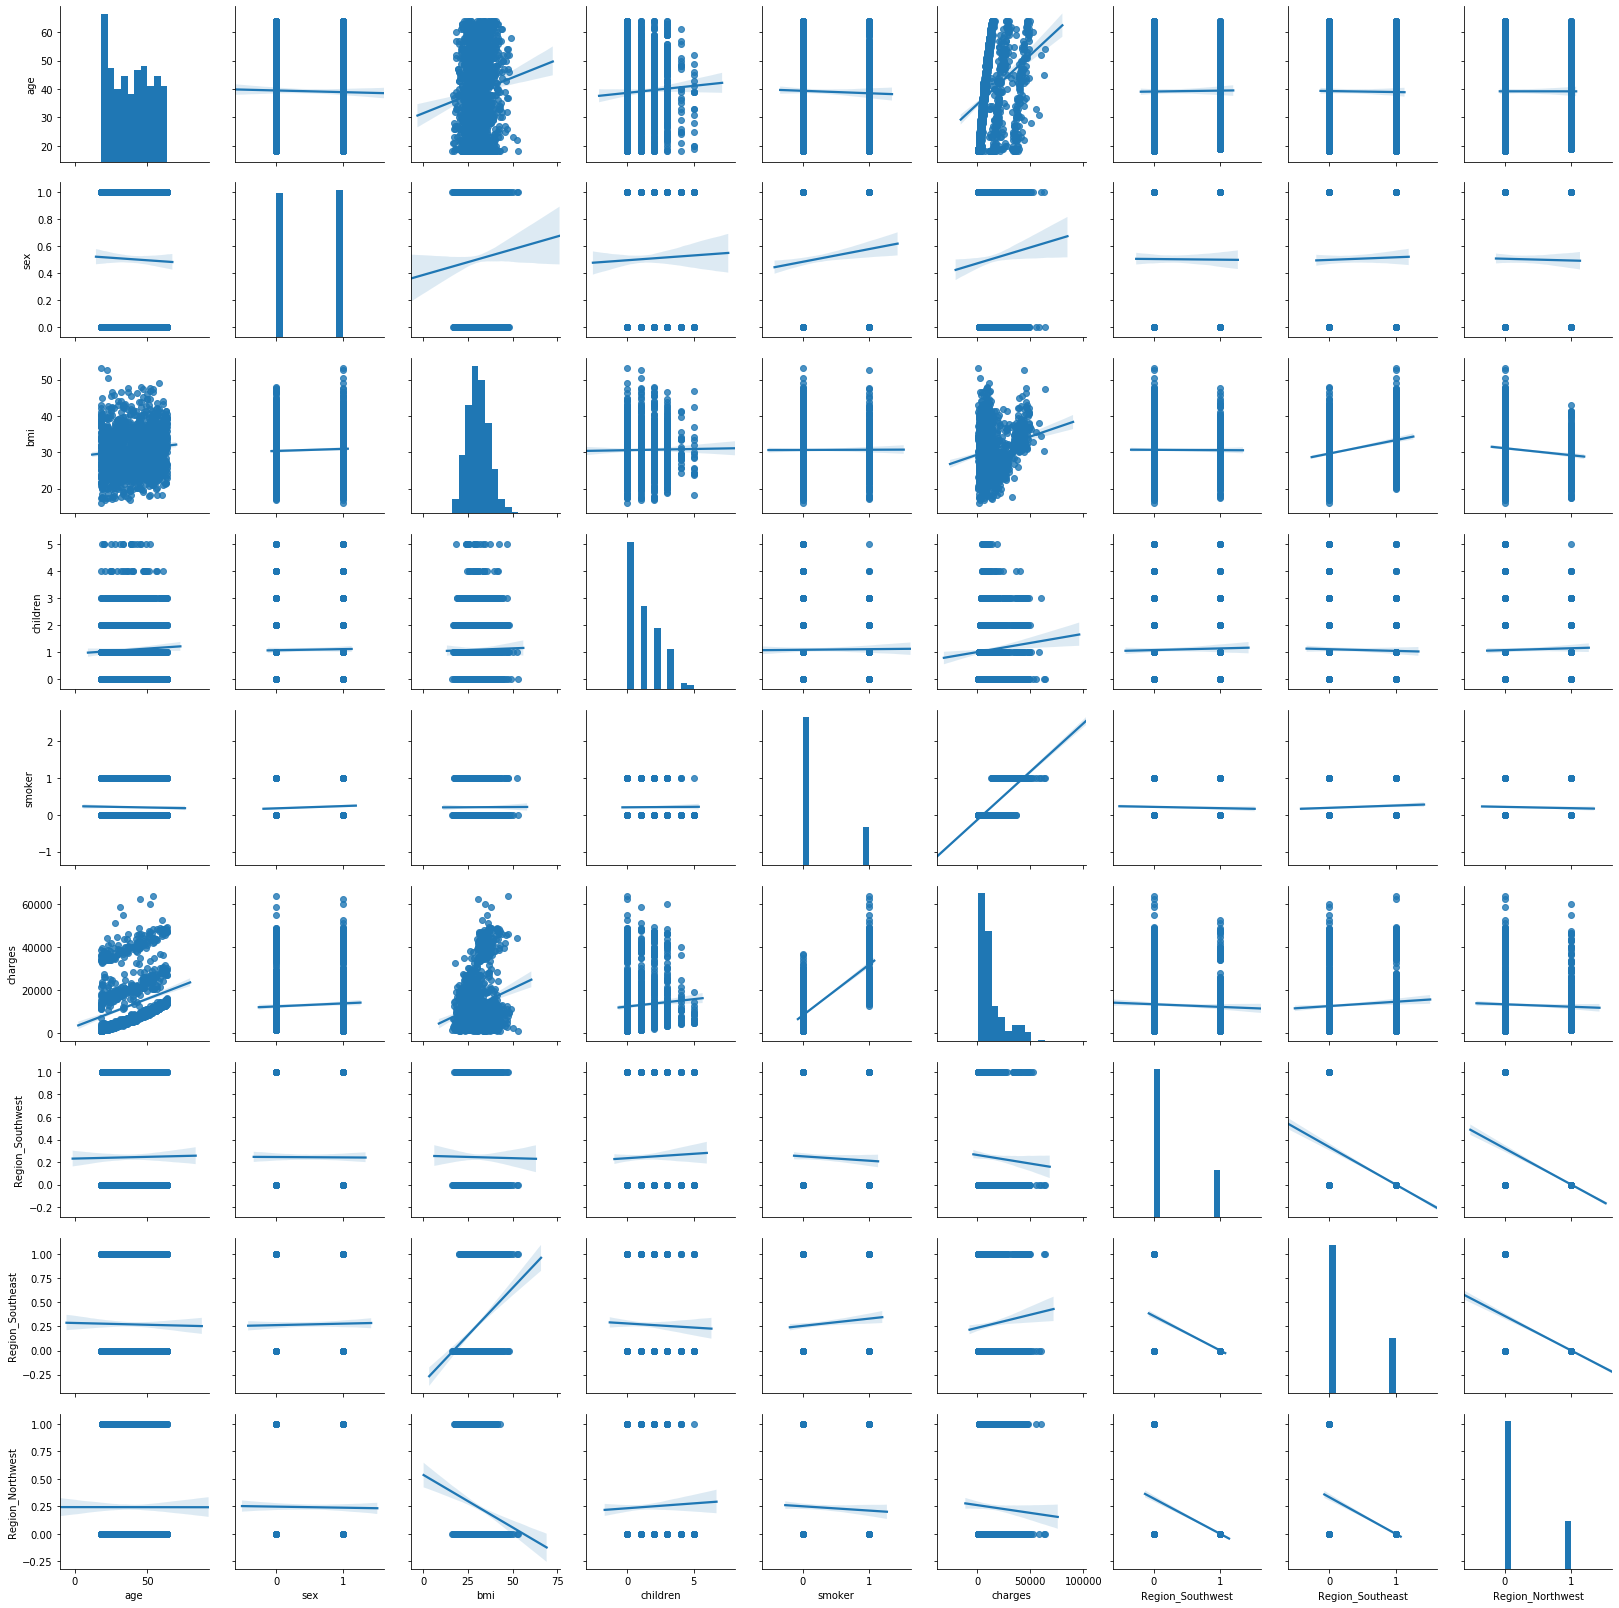

In [14]:
g = sns.pairplot(dataset,kind="reg")

In [ ]:
# Three features have considerable correlation with the dependent variable (Medical expenses)
  # 1. Age
  # 2. BMI
  # 3. Smoker

In [54]:
columns = ['age','bmi','smoker','charges']
data = dataset.reindex(columns=columns)
data.head()



,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


# Feature scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X = minmaxscaler.fit_transform(X)
X

array([[0.02173913, 0.3212268 , 1.        ],
       [0.        , 0.47914985, 0.        ],
       [0.2173913 , 0.45843422, 0.        ],
       ...,
       [0.        , 0.56201238, 0.        ],
       [0.06521739, 0.26472962, 0.        ],
       [0.93478261, 0.35270379, 1.        ]])

# Visualising the distributions of shortlisted attributes

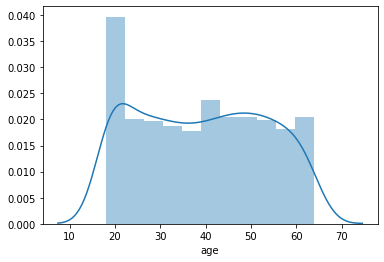

In [27]:
h = sns.distplot(data['age'])

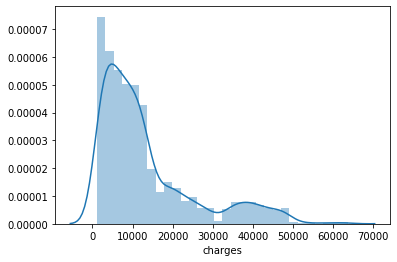

In [28]:
 sns.distplot(data['charges'])

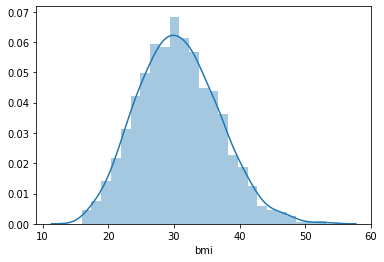

In [29]:
h = sns.distplot(data['bmi'])

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

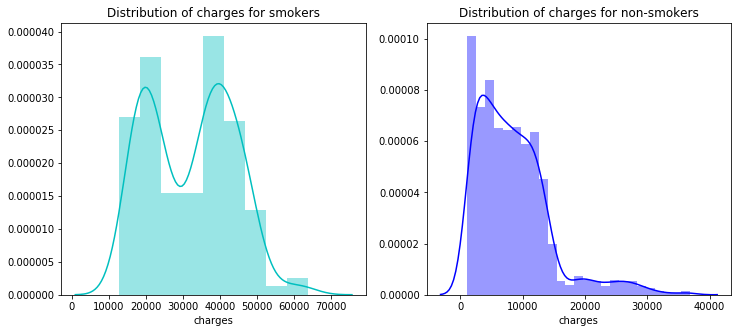

In [37]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [33]:
data.describe()

,age,bmi,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,0.204783,13270.422265
std,14.049960,6.098187,0.403694,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,0.000000,9382.033000
75%,51.000000,34.693750,0.000000,16639.912515
max,64.000000,53.130000,1.000000,63770.428010


# MODEL 1 - AGE vs MEDICAL EXPENSES

In [94]:
X = data.iloc[:,0:1].values
Y = data.iloc[:,3:4].values
X.shape


(1338, 1)

In [98]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           4.89e-29
Time:                        21:14:00   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
x1           257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

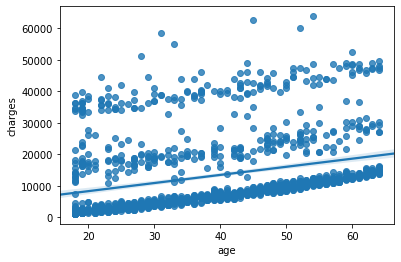

In [41]:
sns.regplot(x="age", y="charges",  data=data)

# MODEL 2 - BMI vs MEDICAL EXPENSES

In [100]:
X = data.iloc[:,1:2].values
Y = data.iloc[:,3:4].values


In [101]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           2.46e-13
Time:                        21:16:33   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
x1           393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

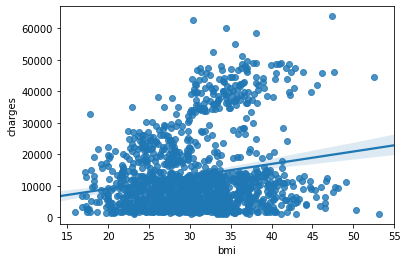

In [103]:
sns.regplot(x="bmi", y="charges",  data=data)

# MODEL 3 - SMOKER vs MEDICAL EXPENSES

In [104]:
X = data.iloc[:,2:3].values
Y = data.iloc[:,3:4].values

In [105]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):          8.27e-283
Time:                        21:18:22   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.000    7985.002    8883.535
x1          2.362e+04    506.075     46.665      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.996   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.201
Skew:                           0.727   Prob(JB):                     8.34e-47
Kurtosis:                       4.300   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

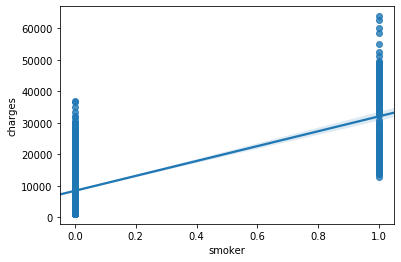

In [107]:
sns.regplot(x="smoker", y="charges",  data=data)

# MODEL 4 - AGE&BMI vs MEDICAL EXPENSES

In [109]:
X = data.iloc[:,0:2].values
Y = data.iloc[:,3:4].values

In [110]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           7.39e-37
Time:                        21:20:36   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.000   -9846.262   -3003.347
x1           241.9308     22.298     10.850      0.000     198.187     285.674
x2           332.9651     51.374      6.481      0.000     232.182     433.748
==============================================================================
Omnibus:                      321.874   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.574
Skew:                           1.511   Prob(JB):                    2.11e-129
Kurtosis:                       4.223   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 5 - AGE & SMOKER vs MEDICAL EXPENSES

In [116]:
X = data.iloc[:,[0,2]].values
Y = data.iloc[:,3:4].values


In [117]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:25:57   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2391.6264    528.302     -4.527      0.000   -3428.019   -1355.234
x1           274.8712     12.455     22.069      0.000     250.437     299.305
x2          2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.59e-139
Kurtosis:                       5.609   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 6 - BMI & SMOKER vs MEDICAL EXPENSES

In [118]:
X = data.iloc[:,[1,2]].values
Y = data.iloc[:,3:4].values

In [119]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1284.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):          1.03e-311
Time:                        21:27:18   Log-Likelihood:                -13760.
No. Observations:                1338   AIC:                         2.753e+04
Df Residuals:                    1335   BIC:                         2.754e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3459.0955    998.279     -3.465      0.001   -5417.463   -1500.728
x1           388.0152     31.787     12.207      0.000     325.656     450.374
x2          2.359e+04    480.180     49.136      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      153.688   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.253
Skew:                           0.805   Prob(JB):                     1.11e-52
Kurtosis:                       4.303   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 7 - AGE & BMI & SMOKER  vs MEDICAL EXPENSES

In [125]:
X = data.iloc[:,[0,1,2]].values
Y = data.iloc[:,3:4].values
X.shape

(1338, 3)

In [126]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:29:33   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
x1           259.5475     11.934     21.748      0.000     236.136     282.959
x2           322.6151     27.487     11.737      0.000     268.692     376.538
x3          2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""